Most of these files are Rabi oscillation data versus one parameter (such as drive power or frequency). This notebook works if you want to plot and fit rabi oscillations

In [1]:
import matplotlib.pyplot as plt
from shabanipy.labber import LabberData
import numpy as np
from shabanipy.resonators.billys_code.utils.jy_mpl_settings.settings import jy_mpl_rc
from shabanipy.resonators.billys_code.utils.jy_mpl_settings.colors import line_colors

from scipy.optimize import curve_fit

import shabanipy.resonators.billys_code.utils.qubit_functions as qf
import shabanipy.resonators.billys_code.utils.resonator_functions as rf
import shabanipy.resonators.billys_code.utils.fluxonium_functions as ff

plt.style.use(jy_mpl_rc)

root = '/Users/billystrickland/Library/CloudStorage/GoogleDrive-wms269@nyu.edu/.shortcut-targets-by-id/1p4A2foj_vBr4k6wrGEIpURdVkG-qAFgb/nyu-quantum-engineering-lab/labber/data-backups/qubitfridge/Data'

def get_data(FILE, channels):
    data=[]
    for i in channels:
        with LabberData(FILE) as f:
            data.append(f.get_data(i))
    return data

In [2]:
day = '15'
file_num = '428'
month = '03'
year = '2024'
sample = 'JS801-4fluxonium@v5-01-CD02-WMSLJB'

end = f'/{year}/{month}/Data_{month}{day}/{sample}-{file_num}.hdf5'

FILE = f"{root}{end}"
channels = ['Digitizer ShabLab - Ch3 - Signal', 'Digitizer ShabLab - Ch4 - Signal',
            'SC3 - Drive - Amplitude']

I, Q, drive = get_data(FILE, channels)


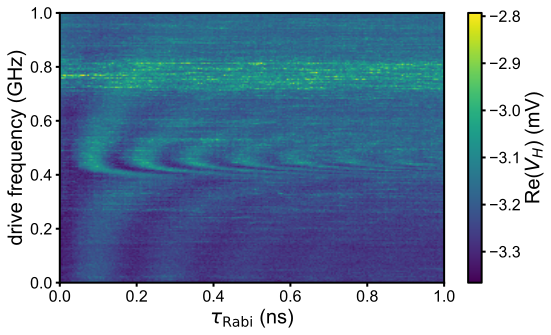

In [3]:
drive = np.unique(drive)
phase_2d = I[:,:,0]

time = np.linspace(1, len(phase_2d[0]), len(phase_2d[0]))*2e-9
time_hr = np.linspace(1, len(phase_2d[0]), 5000)*2e-9

drive = np.sort(drive)

Q_avg = np.mean(I[:,:,70::], axis=-1)

fig, _ = qf.plot_rabi_2d(Q_avg[::-1]*1e3, 
             xlabel = r'$\tau_\mathrm{Rabi}$ (ns)',
             ylabel='drive frequency (GHz)', 
             zlabel = 'Re($V_H$) (mV)', 
#              extent=[time[0]*1e9,time[-1]*1e9, drive[0]*1e-9, drive[-1]*1e-9],
#              zlim = [-.4, 1.2],
               )    
ff.save_fig(fig, f'{sample}_{file_num}_T2ramsey_2dplot')

In [17]:
day = '24'
file_num = '701'
month = '03'
year = '2024'
sample = 'JS801-4fluxonium@v5-01-CD02-WMSLJB'
end = f'/{year}/{month}/Data_{month}{day}/{sample}-{file_num}.hdf5'

FILE = f"{root}{end}"
channels = ['Digitizer ShabLab - Ch3 - Signal', 'Digitizer ShabLab - Ch4 - Signal',
            'MQPG - Width']

I, Q, width = get_data(FILE, channels)

print(np.shape(I))


(9, 3, 21, 50, 400)


ValueError: x and y can be no greater than 2-D, but have shapes (9,) and (9, 3, 21, 50)

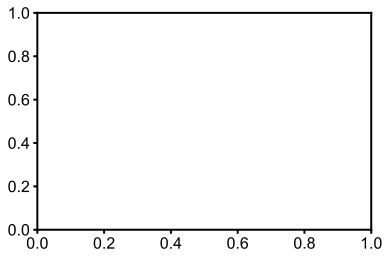

In [18]:

Q_avg = np.mean(Q, axis=-1)
plt.plot(Q_avg)
fig, _ = qf.plot_rabi_2d(Q_avg[::-1]*1e3, 
             xlabel = r'$\tau_\mathrm{Rabi}$ (ns)',
             ylabel='drive frequency (GHz)', 
             zlabel = 'Re($V_H$) (mV)', 
             extent=[time[0]*1e9,time[-1]*1e9, drive[0]*1e-9, drive[-1]*1e-9],
             zlim = [-.4, 1.2],
               )    
ff.save_fig(fig, f'{sample}_{file_num}_T2ramsey_2dplot')

A, T, freq, m, b, p =  [4.27476438e-01 9.84750748e-08 2.64892967e+07 9.41064403e+05
 1.43371362e-01 6.28418531e+00]
measured meter swing =  -0.85 deg


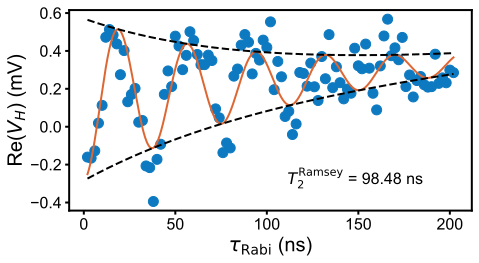

In [11]:
linecut = Q_avg[35]
bounds = [
    [0, 10e-9, 2e6, 0, linecut[0] - 20, 0],
    [1000, 1000e-9, 1.7e8, 1e10, linecut[0] + 20, 2*np.pi+.001]
]

popt, _, fig, ax= qf.fit_rabi_linecut(time = time, signal = linecut*1e3,
                    bounds = bounds,
                    ylabel = 'Re($V_H$) (mV)',
                    figsize = (7, 4)
                   )
plt.annotate('$T_2^{\mathrm{Ramsey}}$ = '+f'{round(popt[1]*1e9,2)} ns', xycoords = 'figure fraction', xy = (.6, .3))
ff.save_fig(fig, f'{sample}_{file_num}_T2ramsey_trace')

A, T, freq, m, b, p =  [ 1.00000000e+00  7.09378118e-07  1.14481528e+07  1.04640164e+05
 -4.02745009e+00  3.20479844e+00]
measured meter swing =  -2.0 deg


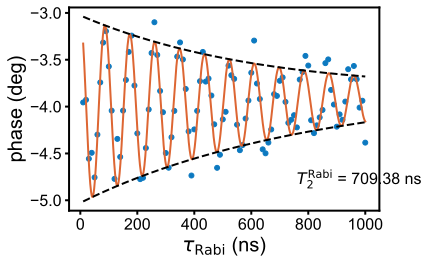

In [110]:
day = '02'
file_num = '263'
month = '03'
year = '2024'
sample = 'JS801-4fluxonium@v5-01-CD02-WMSLJB'

end = f'/{year}/{month}/Data_{month}{day}/{sample}-{file_num}.hdf5'

FILE = f"{root}{end}"
channels = ['Digitizer ShabLab - Ch3 - Signal', 'Digitizer ShabLab - Ch4 - Signal']

I, Q = get_data(FILE, channels)

linecut = Q[:,0]
linecut = linecut[0:100]

time = np.linspace(1, len(linecut), len(linecut))*10e-9
time_hr = np.linspace(1, len(linecut), 5000)*10e-9

bounds = [
    [1, 700e-9, .01e6, 0, linecut[0] - 20, 0],
    [2, 1000e-9, 20e6, 1e10, linecut[0] + 20, 10]
]

popt, _, fig, ax= qf.fit_rabi_linecut(time = time, signal = linecut*1e3,
                    bounds = bounds
                   )
plt.annotate('$T_2^{\mathrm{Rabi}}$ = '+f'{round(popt[1]*1e9,2)} ns', xycoords = 'figure fraction', xy = (.7, .3))
ff.save_fig(fig, f'{sample}_{file_num}_T2ramsey_trace')

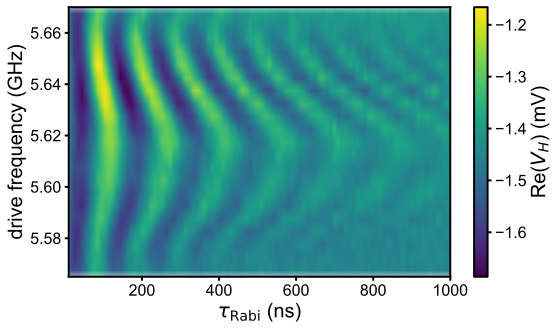

In [106]:
day = '02'
file_num = '28'
month = '03'
year = '2024'
sample = 'JS801-4fluxonium@v5-01-CD02-WMSLJB'
end = f'/{year}/{month}/Data_{month}{day}/{sample}-{file_num}.hdf5'

FILE = f"{root}{end}"
channels = ['Digitizer ShabLab - Ch3 - Signal', 'Digitizer ShabLab - Ch4 - Signal',             
            'SC3 - Drive - Frequency']

I, Q, drive = get_data(FILE, channels)
drive = np.unique(drive)

phase_2d = Q[:,:,0]

time = np.linspace(1, len(phase_2d[0]), len(phase_2d[0]))*10e-9
time_hr = np.linspace(1, len(phase_2d[0]), 5000)*10e-9

drive = np.sort(drive)
signal = I[:,:, 0]

Q_avg = np.mean(I[:, :], axis=-1)
Q_avg = Q_avg[13:34]
qf.plot_rabi_2d(Q_avg[::-1]*1e3, 
             r'$\tau_\mathrm{Rabi}$ (ns)',
             'drive frequency (GHz)', 
             'Re($V_H$) (mV)', 
             [time[0]*1e9,time[-1]*1e9, drive[13]*1e-9, drive[34]*1e-9],
#               zlim = [-1.5, -1.2] 
               )    
# plt.ylim(5.6, 5.75)
ff.save_fig(fig, f'{sample}_{file_num}_T2ramsey_2dplot')

A, T, freq, m, b, p =  [ 1.43443982e-01  1.67842166e-07  9.32425178e+06  1.16709652e+04
 -1.45604780e+00  3.69296382e+02]
measured meter swing =  -0.29 deg
A, T, freq, m, b, p =  [ 1.54647472e-01  2.01464153e-07  9.50630048e+06  2.79748687e+04
 -1.47000106e+00  3.37815555e+02]
measured meter swing =  -0.31 deg
A, T, freq, m, b, p =  [ 1.57085480e-01  2.75859778e-07  9.28033447e+06  2.13848332e+04
 -1.47046400e+00  3.75529459e+02]
measured meter swing =  -0.31 deg
A, T, freq, m, b, p =  [ 1.60865638e-01  3.56415980e-07  8.67211187e+06  3.35210751e+04
 -1.47474971e+00  3.37876733e+02]
measured meter swing =  -0.32 deg
A, T, freq, m, b, p =  [ 1.61198564e-01  4.27003585e-07  7.95834508e+06  1.54144647e+04
 -1.46080704e+00  3.12789314e+02]
measured meter swing =  -0.32 deg
A, T, freq, m, b, p =  [ 1.78970292e-01  4.38648314e-07  7.45649355e+06  2.62443507e+04
 -1.45837000e+00  3.00120101e+02]
measured meter swing =  -0.36 deg
A, T, freq, m, b, p =  [ 1.74691123e-01  4.19417073e-07  7.20662

 /Users/billystrickland/Documents/code/resonators/utils/resonator_functions.py: 23

A, T, freq, m, b, p =  [ 2.16220903e-01  1.64939139e-07  9.21641919e+06  1.89325049e+04
 -1.41298603e+00  2.99867985e+02]
measured meter swing =  -0.43 deg


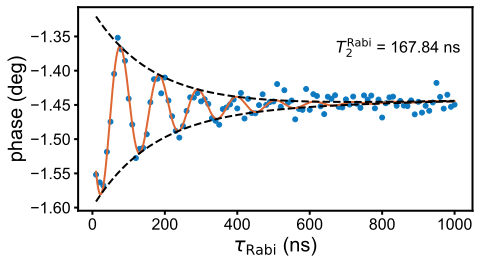

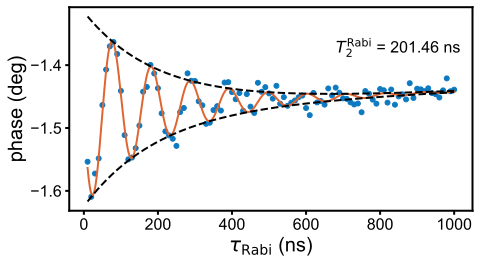

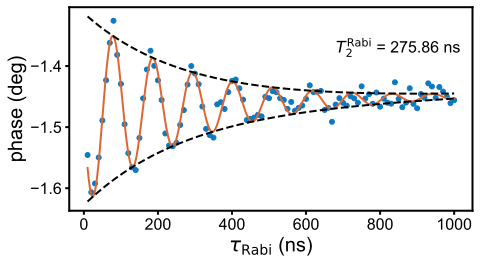

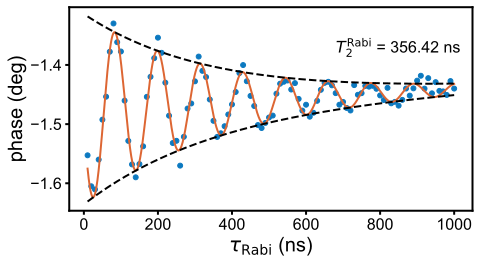

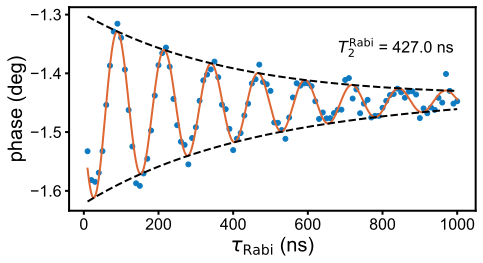

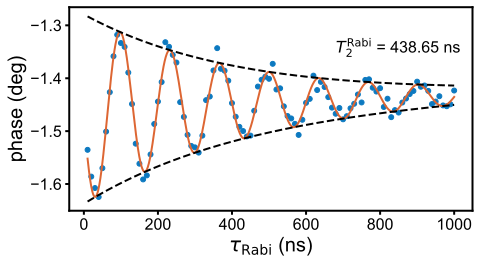

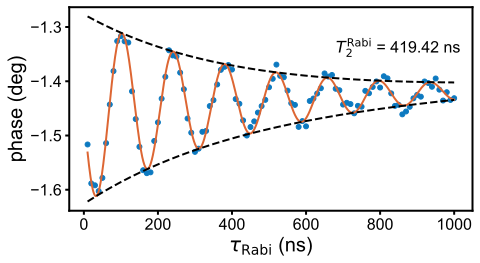

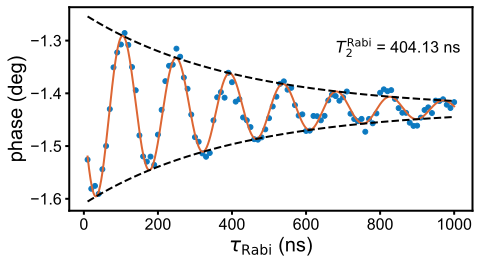

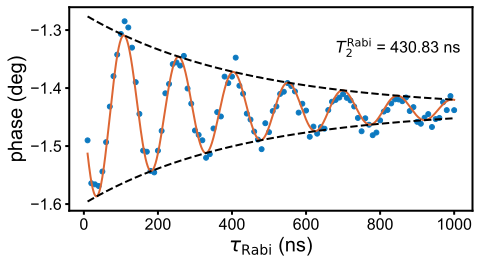

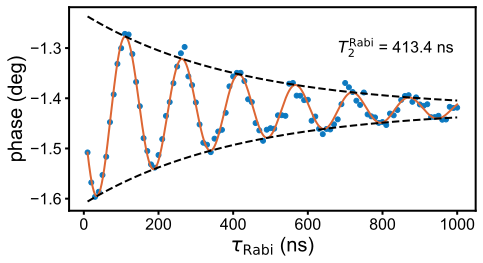

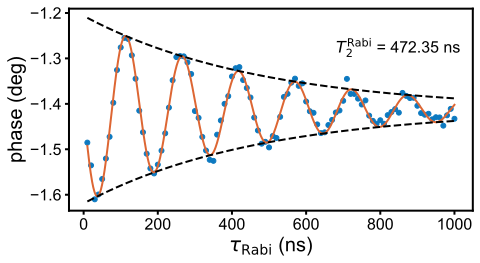

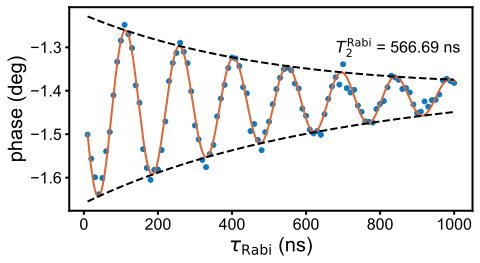

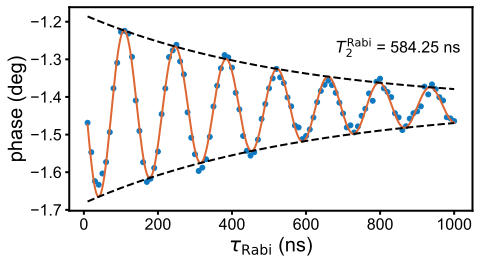

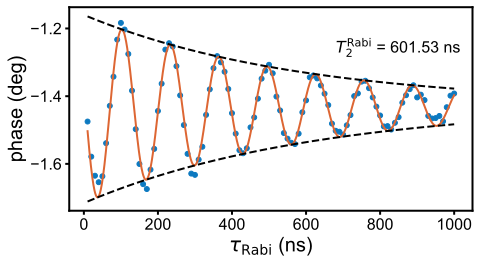

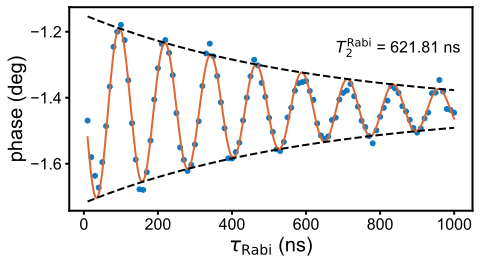

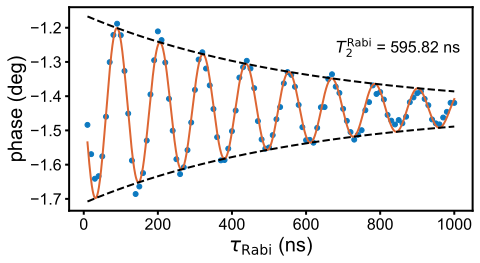

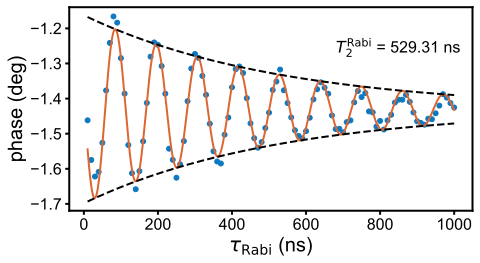

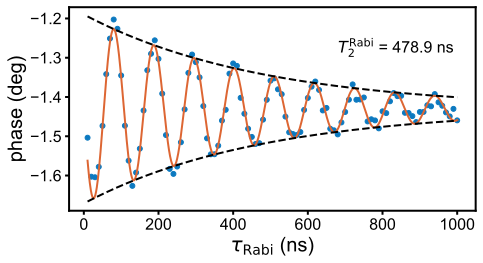

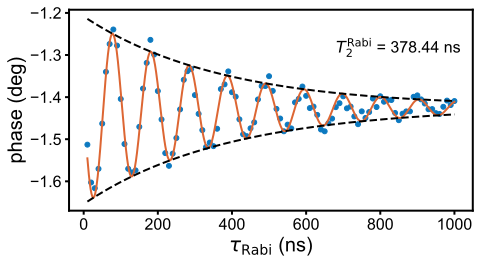

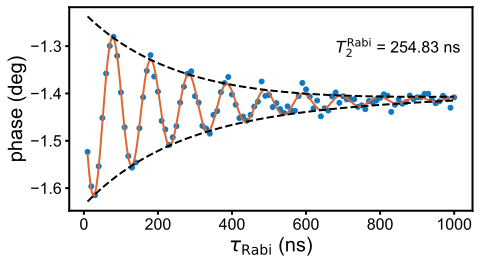

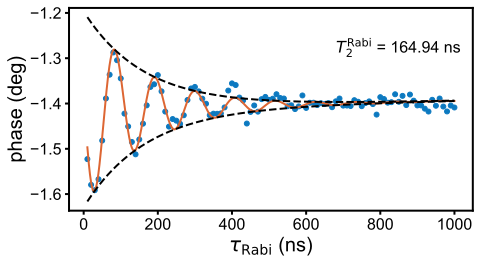

In [107]:
rabifreqs = []

for i in range(len(Q_avg)):
    linecut = Q_avg[i]

    bounds = [
        [.1, 100e-9, 3.96076358e+05, 0, linecut[0] - 20, 0],
        [.3, 1000e-9, 20e6, 1e10, linecut[0] + 20, 400]
    ]

    popt, _, fig, ax= qf.fit_rabi_linecut(time = time, signal = linecut*1e3,
                        bounds = bounds,
                        figsize = (7,4)
                       )
    plt.annotate('$T_2^{\mathrm{Rabi}}$ = '+f'{round(popt[1]*1e9,2)} ns', xycoords = 'figure fraction', xy = (.7, .8))
    ff.save_fig(fig, f'{sample}_{file_num}_T2ramsey_trace')
    rabifreqs.append(popt[2])
    


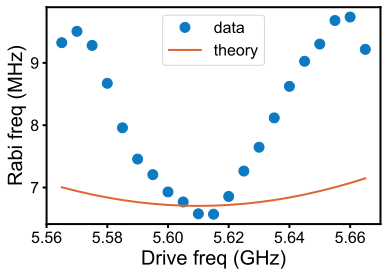

In [109]:
drivefreqs = drive[13:34]
fig, ax = plt.subplots()
plt.plot(drivefreqs*1e-9, np.array(rabifreqs)*1e-6, marker = 'o', linestyle = 'None',label= 'data')
plt.plot(drivefreqs*1e-9, .045*np.sqrt((149e6**2)+(5.61e9-drivefreqs)**2)*1e-6, label = 'theory')
plt.ylabel('Rabi freq (MHz)')
plt.xlabel('Drive freq (GHz)')
plt.legend()

A, T, freq, m, b, p =  [ 1.55529879e-01  6.22849709e-07  7.66342716e+06  9.12401964e-06
 -1.35806924e+00  4.51105687e+02]
measured meter swing =  -0.31 deg


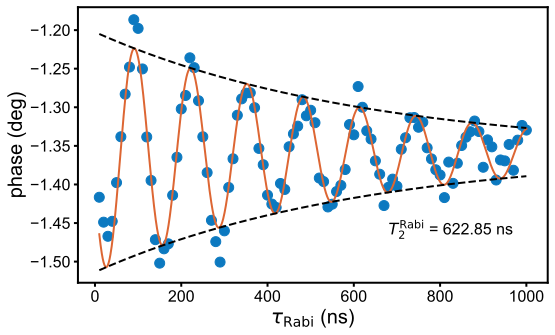

In [101]:
linecut = Q_avg[26]

bounds = [
    [.05, 200e-9, .01e6, 0, linecut[0] - 20, 0],
    [2, 1000e-9, 20e6, 1e10, linecut[0] + 20, 1000]
]

popt, _, fig, ax= qf.fit_rabi_linecut(time = time, signal = linecut*1e3,
                    bounds = bounds
                   )
plt.annotate('$T_2^{\mathrm{Rabi}}$ = '+f'{round(popt[1]*1e9,2)} ns', xycoords = 'figure fraction', xy = (.7, .3))
ff.save_fig(fig, f'{sample}_{file_num}_T2ramsey_trace')

In [103]:
day = '02'
file_num = '27'
month = '03'
year = '2024'
sample = 'JS801-4fluxonium@v5-01-CD02-WMSLJB'
end = f'/{year}/{month}/Data_{month}{day}/{sample}-{file_num}.hdf5'

root = '/Users/billystrickland/Library/CloudStorage/GoogleDrive-wms269@nyu.edu/.shortcut-targets-by-id/1p4A2foj_vBr4k6wrGEIpURdVkG-qAFgb/nyu-quantum-engineering-lab/labber/data-backups/qubitfridge/Data'

FILE = f"{root}{end}"
channels = ['Digitizer ShabLab - Ch3 - Signal', 'Digitizer ShabLab - Ch4 - Signal',             
            'SC3 - Drive - Amplitude']

I, Q, drive = get_data(FILE, channels)
drive = np.unique(drive)

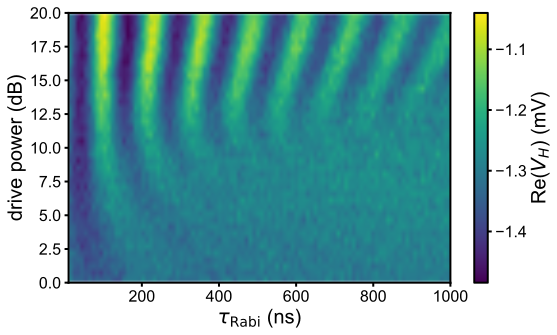

In [115]:
phase_2d = Q[:,:,0]

time = np.linspace(1, len(phase_2d[0]), len(phase_2d[0]))*10e-9
time_hr = np.linspace(1, len(phase_2d[0]), 5000)*10e-9

drive = np.sort(drive)
signal = I[:,:, 0]

Q_avg = np.mean(I[:,:,50::], axis=-1)
Q_avg = Q_avg[0:101]
qf.plot_rabi_2d(Q_avg*1e3, 
             r'$\tau_\mathrm{Rabi}$ (ns)',
             'drive power (dB)', 
             'Re($V_H$) (mV)', 
             [time[0]*1e9,time[-1]*1e9, drive[0], drive[-1]],
               )    
ff.save_fig(fig, f'{sample}_{file_num}_T2ramsey_2dplot')

A, T, freq, m, b, p =  [ 2.28085984e-01  1.01229030e-06  7.68959237e+06  3.42429555e-05
 -1.26877048e+00  4.38116334e+02]
measured meter swing =  -0.46 deg


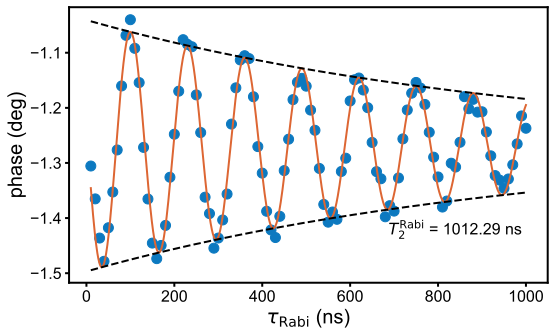

In [113]:
linecut = Q_avg[0]

bounds = [
    [.05, 200e-9, .1e6, 0, linecut[0] - 10, 0],
    [2, 10000e-9, 20e6, 1e10, linecut[0] + 10, 1000]
]

popt, _, fig, ax= qf.fit_rabi_linecut(time = time, signal = linecut*1e3,
                    bounds = bounds
                   )
plt.annotate('$T_2^{\mathrm{Rabi}}$ = '+f'{round(popt[1]*1e9,2)} ns', xycoords = 'figure fraction', xy = (.7, .3))
ff.save_fig(fig, f'{sample}_{file_num}_T2ramsey_trace')

In [175]:
day = '15'
file_num = '428'
month = '03'
year = '2024'
sample = 'JS801-4fluxonium@v5-01-CD02-WMSLJB'
end = f'/{year}/{month}/Data_{month}{day}/{sample}-{file_num}.hdf5'

root = '/Users/billystrickland/Library/CloudStorage/GoogleDrive-wms269@nyu.edu/.shortcut-targets-by-id/1p4A2foj_vBr4k6wrGEIpURdVkG-qAFgb/nyu-quantum-engineering-lab/labber/data-backups/qubitfridge/Data'

FILE = f"{root}{end}"
channels = ['Digitizer ShabLab - Ch3 - Signal', 'Digitizer ShabLab - Ch4 - Signal',             
            'SC3 - Drive - Amplitude']

I, Q, drive = get_data(FILE, channels)
drive = np.unique(drive)

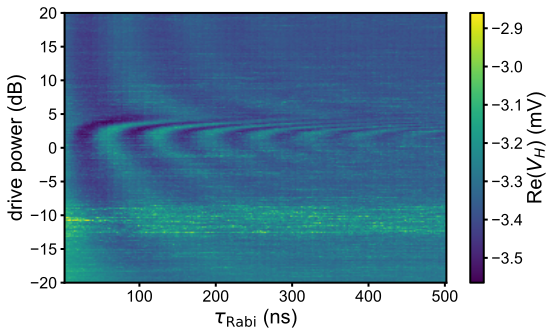

In [206]:
time = np.linspace(1, len(I[0]), len(I[0]))*2e-9
time_hr = np.linspace(1, len(I[0]), 5000)*2e-9

Q_avg = np.mean(I[:,:,0::], axis=-1)
# Q_avg = Q_avg[0:101]
qf.plot_rabi_2d(Q_avg*1e3, 
             r'$\tau_\mathrm{Rabi}$ (ns)',
             'drive power (dB)', 
             'Re($V_H$) (mV)', 
             [time[0]*1e9,time[-1]*1e9, drive[0], drive[-1]],
               )    
ff.save_fig(fig, f'{sample}_{file_num}_T2ramsey_2dplot')

A, T, freq, m, b, p =  [ 1.96963978e-01  4.11835842e-07  1.34182910e+07  9.45100242e-09
 -3.34711217e+00  5.63123453e+02]
measured meter swing =  -0.39 deg


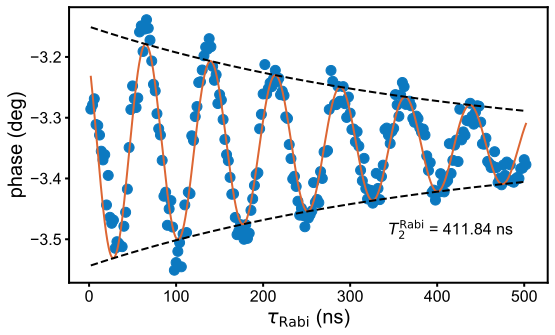

In [207]:
linecut = Q_avg[86]

bounds = [
    [.05, 100e-9, .1e6, 0, linecut[0] - 10, 0],
    [2, 10000e-9, 20e6, 1e10, linecut[0] + 10, 1000]
]

popt, _, fig, ax= qf.fit_rabi_linecut(time = time, signal = linecut*1e3,
                    bounds = bounds
                   )
plt.annotate('$T_2^{\mathrm{Rabi}}$ = '+f'{round(popt[1]*1e9,2)} ns', xycoords = 'figure fraction', xy = (.7, .3))
ff.save_fig(fig, f'{sample}_{file_num}_T2ramsey_trace')

A, T, freq, m, b, p =  [5.92571604e+00 4.41275144e-08 1.61419626e+08 2.47553842e+01
 1.20082661e+02 3.42034947e+00]
measured meter swing =  -11.85 deg


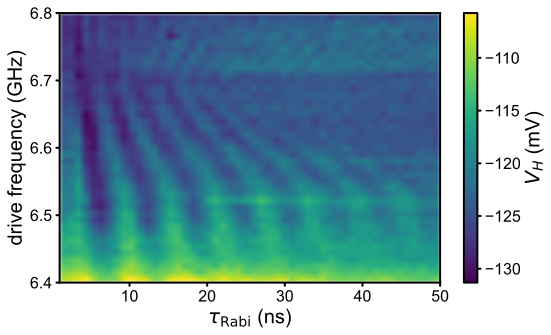

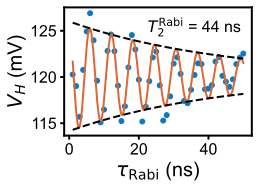

In [6]:
day = '20'
sample = 'JS681-4fluxonium-005-003-BS'
file_num = '036'
month = '10'
year = '2023'
I, Q, drive = qf.get_data_rabiplus1(day, month=month, year=year, file_num=file_num, freq=True)

phase_2d = []
power = drive[:,0]

time_i = 60
phase_2d = qf.get_timed_phase2d(I, Q, 20)[::-1]
signal = phase_2d[0]
time = np.linspace(1, len(signal), len(signal))*1e-9
time_hr = np.linspace(1, len(signal), 5000)*1e-9

plotter = Q[:,:,time_i][::-1]*1e3
fig, ax = qf.plot_rabi_2d(phase_2d, 
                r'$\tau_\mathrm{Rabi}$ (ns)',
                'drive frequency (GHz)', 
                '$V_H$ (mV)', 
                [time[0]*1e9,time[-1]*1e9, power[0]*1e-9, power[-1]*1e-9])
# qf.plot_rabi_2d(I[:,:,time_i][::-1]*1e3, 
#                 r'$\tau_\mathrm{Rabi}$ (ns)',
#                 'drive frequency (GHz)', 
#                 '$V_H$ (mV)', 
#                 [time[0]*1e9,time[-1]*1e9, power[0]*1e-9, power[-1]*1e-9])        
# fig, ax = qf.plot_rabi_2d(Q[:,:,time_i][::-1]*1e3, 
#                 r'$\tau_\mathrm{Rabi}$ (ns)',
#                 'drive frequency (GHz)', 
#                 '$V_H$ (mV)', 
#                 [time[0]*1e9,time[-1]*1e9, power[0]*1e-9, power[-1]*1e-9])
ff.save_fig(fig, f'rabi_{sample}-{file_num}_2d')

signal = -phase_2d[-11]

bounds = [
    [-10, 30e-9, 0, 1e-9, signal[0] - 20, 0],
    [10, 100e-9, 0.2e9, 1e9, signal[0] + 20, 2 * np.pi]
]

fit = qf.fit_rabi_linecut(time = time, signal = signal, bounds = bounds, figsize = (4, 3))
plt.annotate('$T_2^{\mathrm{Rabi}}$ = '+f'{round(fit[0][1]*1e9)} ns', xycoords = 'figure fraction', xy = (.57, .83))
ff.save_fig(fit[2], f'rabi_{sample}-{file_num}')

A, T, freq, m, b, p =  [-1.11676530e-04  1.00000000e-07  1.71128631e+08  1.00000000e-09
 -3.70811854e-04  2.71551675e+01]
measured meter swing =  0.0 deg


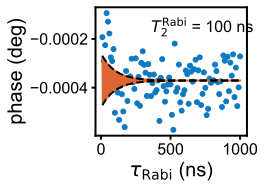

In [112]:

signal = -phase_2d[-11]

bounds = [
    [-10, 30e-9, 0, 1e-9, signal[0] - 20, 0],
    [10, 100e-9, 0.2e9, 1e9, signal[0] + 20, 100]
]

fit = qf.fit_rabi_linecut(time = time, signal = signal, bounds = bounds, figsize = (4, 3))
plt.annotate('$T_2^{\mathrm{Rabi}}$ = '+f'{round(fit[0][1]*1e9)} ns', xycoords = 'figure fraction', xy = (.57, .83))
ff.save_fig(fit[2], f'rabi_{sample}-{file_num}')

In [9]:
day  = '20'
file_num = '459'
month = '10'
year = '2023'
sample = 'JS681-4fluxonium-005-002-BS'
end = f'/{year}/{month}/Data_{month}{day}/{sample}-{file_num}.hdf5'

FILE = f"{root}{end}"
channels = ['SC1 - Drive - Amplitude', 'Digitizer ShabLab - Ch3 - Signal', 'Digitizer ShabLab - Ch4 - Signal']
drive, I, Q = get_data(FILE, channels)

phase_2d = []
power = drive[:,0]

time_i = 60
# phase_2d = qf.get_timed_phase2d(I, Q, 10)[0:-2]

signal = Q[:,:,time_i][0:-2]*1e3

time = np.linspace(1, len(signal), len(signal))*1e-9
time_hr = np.linspace(1, len(signal), 5000)*1e-9

qf.plot_rabi_2d(Q[:,:,time_i][5:-2]*1e3, r'$\tau_\mathrm{Rabi}$ (ns)','drive power (dB)', 'Im($V_H$) (mV)', 
          [time[0]*1e9,time[-1]*1e9, power[0], power[-1]])
ff.save_fig(fig, f'rabi_{sample}-{file_num}_2d')

signal = signal[-10]
bounds = [
    [-50, 10e-9, 0, 1e-9, signal[0] - 20, 0],
    [50, 100e-9, 0.2e9, 1e9, signal[0] + 20, 2 * np.pi]
]
time  = np.linspace(0, len(signal), len(signal))*1e-9

popt, perr, fig, ax = qf.fit_rabi_linecut(time = time, signal = signal, bounds = bounds, figsize = (4, 3))
plt.annotate('$T_2^{\mathrm{Rabi}}$ = '+f'{round(popt[1]*1e9)} ns', xycoords = 'figure fraction', xy = (.57, .35))
ff.save_fig(fig, f'rabi_{sample}-{file_num}')

OSError: Unable to open file (unable to open file: name = '/Users/billystrickland/Library/CloudStorage/GoogleDrive-wms269@nyu.edu/.shortcut-targets-by-id/1p4A2foj_vBr4k6wrGEIpURdVkG-qAFgb/nyu-quantum-engineering-lab/labber/data-backups/qubitfridge/Data/2023/10/Data_1020/JS681-4fluxonium-005-002-BS-459.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

A, T, freq, m, b, p =  [ 1.00733583e+00  6.61835907e-08  7.43396517e+07  1.76161226e+07
 -1.11306698e+01  6.28318487e+00]
measured meter swing =  -2.01 deg


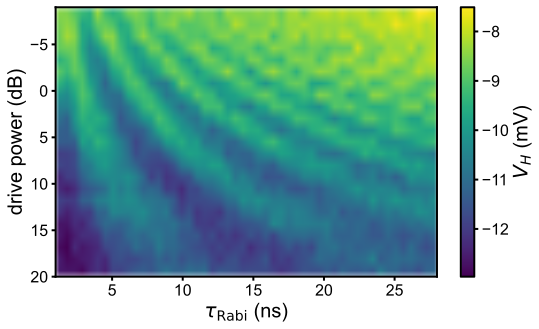

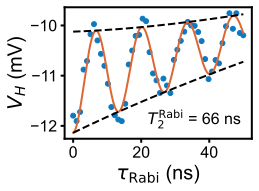

In [8]:
day  = '20'
file_num = '037'
month = '10'
year = '2023'
sample = 'JS681-4fluxonium-005-003-BS'
end = f'/{year}/{month}/Data_{month}{day}/{sample}-{file_num}.hdf5'

FILE = f"{root}{end}"
channels = ['SC1 - Drive - Amplitude', 'Digitizer ShabLab - Ch3 - Signal', 'Digitizer ShabLab - Ch4 - Signal']
drive, I, Q = get_data(FILE, channels)

phase_2d = []
power = drive[:,0]

time_i = 60
phase_2d = qf.get_timed_phase2d(I, Q, 10)[0:-2]

signal = Q[:,:,time_i][0:-2]*1e3

time = np.linspace(1, len(signal), len(signal))*1e-9
time_hr = np.linspace(1, len(signal), 5000)*1e-9

qf.plot_rabi_2d(Q[:,:,time_i][5:-2]*1e3, r'$\tau_\mathrm{Rabi}$ (ns)','drive power (dB)', '$V_H$ (mV)', 
          [time[0]*1e9,time[-1]*1e9, power[0], power[-1]])
ff.save_fig(fig, f'rabi_{sample}-{file_num}_2d')

line = signal[-10]
bounds = [
    [-50, 10e-9, 0, 1e-9, line[0] - 20, 0],
    [50, 100e-9, 0.2e9, 1e9, line[0] + 20, 2 * np.pi]
]
time  = np.linspace(0, len(line), len(line))*1e-9

popt, perr, fig, ax = qf.fit_rabi_linecut(time = time, signal = line, bounds = bounds, figsize = (4, 3))
plt.annotate('$T_2^{\mathrm{Rabi}}$ = '+f'{round(popt[1]*1e9)} ns', xycoords = 'figure fraction', xy = (.57, .35))
ff.save_fig(fig, f'rabi_{sample}-{file_num}')

A, T, freq, m, b, p =  [ 2.37778587e-01  1.00000000e-08  1.65164339e+08  1.94886007e+07
 -8.81500485e+00  2.10797222e+00]
measured meter swing =  -0.48 deg
A, T, freq, m, b, p =  [ 7.13067244e-02  1.00000000e-07  1.55256253e+08  1.77922647e+07
 -8.70942396e+00  3.65196394e+00]
measured meter swing =  -0.14 deg
A, T, freq, m, b, p =  [ 2.53696925e-01  1.00000000e-08  1.07156032e+08  1.74767438e+07
 -8.58140474e+00  4.93949034e+00]
measured meter swing =  -0.51 deg
A, T, freq, m, b, p =  [ 2.21071117e-01  1.40658718e-08  1.44905705e+08  2.66530066e+07
 -8.85171598e+00  3.41479123e+00]
measured meter swing =  -0.44 deg
A, T, freq, m, b, p =  [ 1.07031860e-01  1.00000000e-07  1.53927128e+07  1.67855854e+07
 -8.66102005e+00  4.22536467e+00]
measured meter swing =  -0.21 deg
A, T, freq, m, b, p =  [-3.85724493e-01  1.00000000e-08  1.15616451e+08  2.51592693e+07
 -9.10082896e+00  5.92838231e+00]
measured meter swing =  0.77 deg
A, T, freq, m, b, p =  [ 8.61017277e-01  1.00000000e-08  2.000000

 /Users/billystrickland/Documents/code/resonators/utils/resonator_functions.py: 23

A, T, freq, m, b, p =  [ 1.02756751e+00  4.50639577e-08  6.19242763e+07  1.98677743e+07
 -1.15407765e+01  2.71930403e-11]
measured meter swing =  -2.06 deg
A, T, freq, m, b, p =  [ 9.36917214e-01  5.02788625e-08  5.57183467e+07  1.29804889e+07
 -1.12057595e+01  6.28318531e+00]
measured meter swing =  -1.87 deg
A, T, freq, m, b, p =  [ 1.08339730e+00  4.16273812e-08  5.18602775e+07  1.35477047e+07
 -1.14119428e+01  6.14762665e+00]
measured meter swing =  -2.17 deg
A, T, freq, m, b, p =  [ 9.79128258e-01  4.35154237e-08  4.68095247e+07  1.74532033e+07
 -1.16439026e+01  6.21940913e+00]
measured meter swing =  -1.96 deg
A, T, freq, m, b, p =  [ 9.71064488e-01  3.03302857e-08  4.43114959e+07  1.14229306e+07
 -1.17245147e+01  6.03384382e+00]
measured meter swing =  -1.94 deg
A, T, freq, m, b, p =  [ 9.59104251e-01  3.42743768e-08  3.85364875e+07  1.30856015e+07
 -1.19102651e+01  6.27945194e+00]
measured meter swing =  -1.92 deg
A, T, freq, m, b, p =  [ 2.41532502e-01  1.05940095e-08  1.20902

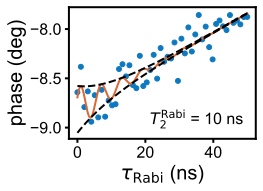

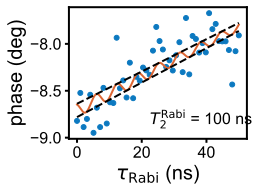

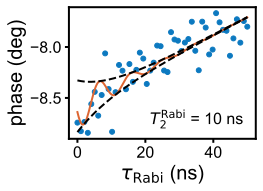

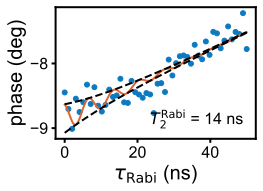

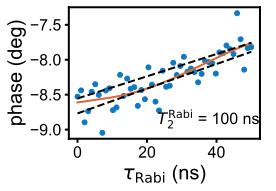

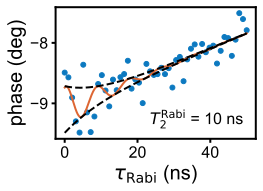

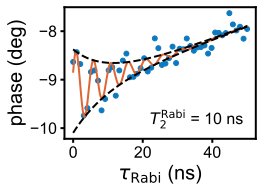

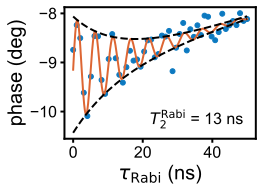

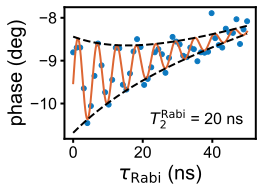

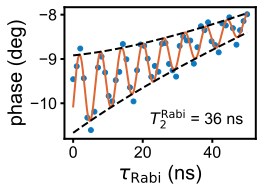

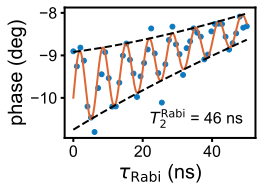

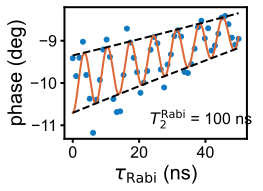

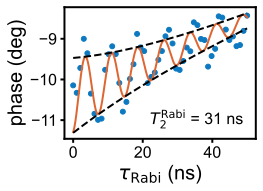

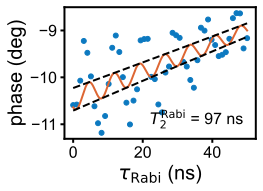

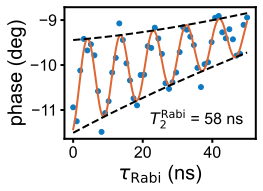

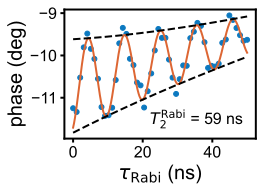

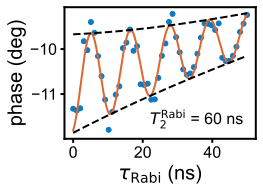

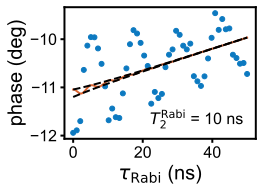

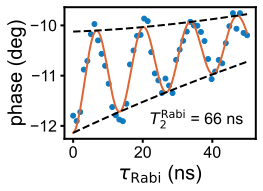

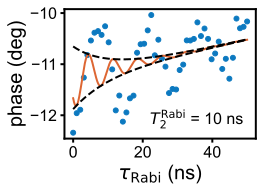

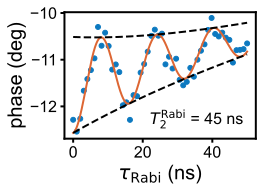

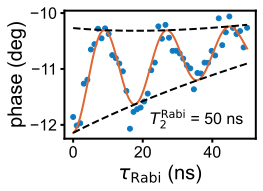

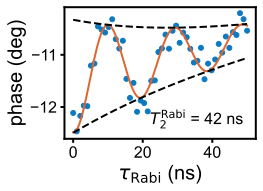

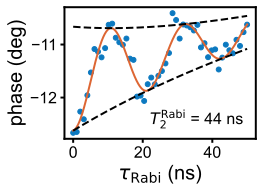

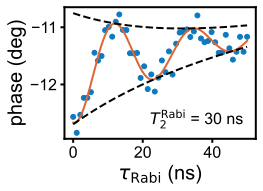

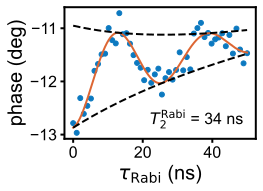

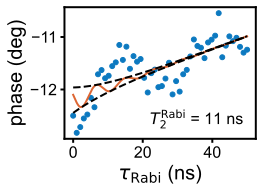

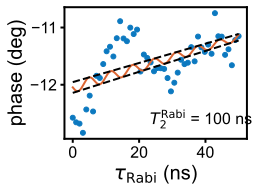

In [103]:
for i in range(len(signal)):
    line = signal[i]
    bounds = [
        [-50, 10e-9, 0, 1e-9, line[0] - 20, 0],
        [50, 100e-9, 0.2e9, 1e9, line[0] + 20, 2 * np.pi]
    ]
    time  = np.linspace(0, len(line), len(line))*1e-9

    popt, perr, fig, ax = qf.fit_rabi_linecut(time = time, signal = line, bounds = bounds, figsize = (4, 3))
    plt.annotate('$T_2^{\mathrm{Rabi}}$ = '+f'{round(popt[1]*1e9)} ns', xycoords = 'figure fraction', xy = (.57, .35))
    ff.save_fig(fig, f'rabi_{sample}-{file_num}')

In [53]:
phase_2d = []
power = drive[:,0]

time_i = 60
phase_2d = qf.get_timed_phase2d(I, Q, 10)[::-1]

time = np.linspace(1, len(signal), len(signal))*1e-9
time_hr = np.linspace(1, len(signal), 5000)*1e-9

In [49]:
day = '19'
file_num = '459'
I, Q, drive = qf.get_data_rabiplus1(day, month=month, year=year, file_num=file_num, sample = 'JS681-4fluxonium-005-002-BS')

In [50]:
phase_2d = []
power = drive[:,0]

time_i = 60
phase_2d = qf.get_timed_phase2d(I, Q, 10)[::-1]

time = np.linspace(1, len(signal), len(signal))*1e-9
time_hr = np.linspace(1, len(signal), 5000)*1e-9

In [3]:
qf.plot_rabi_2d(phase_2d, r'$\tau_\mathrm{Rabi}$ (ns)','drive frequency (GHz)', 'phase (deg)', 
          [time[0]*1e9,time[-1]*1e9, power[0]*1e-9, power[-1]*1e-9])
qf.plot_rabi_2d(I[:,:,time_i][::-1]*1e3, r'$\tau_\mathrm{Rabi}$ (ns)','drive frequency (GHz)', 'Re($V_H$) (mV)', 
          [time[0]*1e9,time[-1]*1e9, power[0]*1e-9, power[-1]*1e-9])        
qf.plot_rabi_2d(Q[:,:,time_i][::-1]*1e3, r'$\tau_\mathrm{Rabi}$ (ns)','drive frequency (GHz)', 'Im($V_H$) (mV)', 
          [time[0]*1e9,time[-1]*1e9, power[0]*1e-9, power[-1]*1e-9])

NameError: name 'qf' is not defined

A, T, freq, m, b, p =  [-6.71228372e-01  1.00000000e-07  1.32589313e+08  8.79205376e-02
  1.29435211e+02  6.28318531e+00]
measured meter swing =  1.34 deg


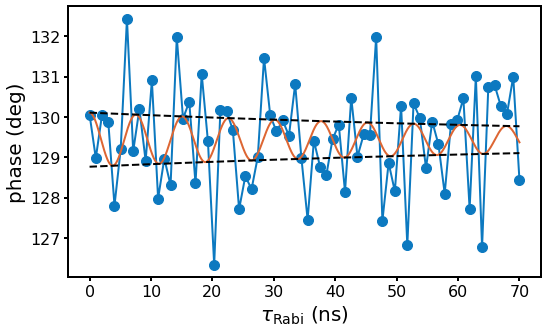

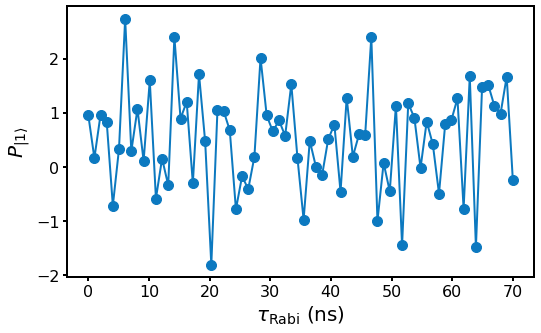

In [22]:
signal = phase_2d[10]

bounds = [
    [-10, 30e-9, 0, 1e-9, signal[0] - 20, 0],
    [10, 100e-9, 0.2e9, 1e9, signal[0] + 20, 2 * np.pi]
]
time  = np.linspace(0, len(signal), len(signal))*1e-9

qf.fit_rabi_linecut(time = time, signal = signal, bounds = bounds)

In [23]:
day = '19'
file_num = '461'
I, Q, drive = qf.get_data_rabiplus1(day, month=month, year=year, file_num=file_num, sample = 'JS681-4fluxonium-005-002-BS')

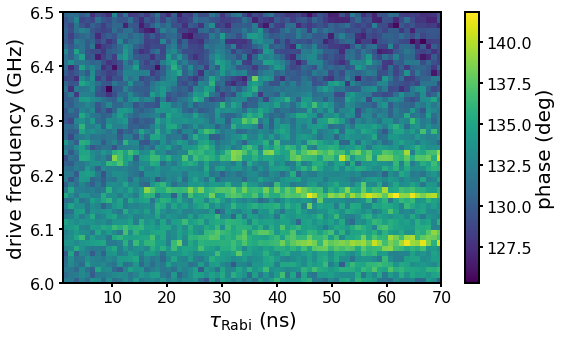

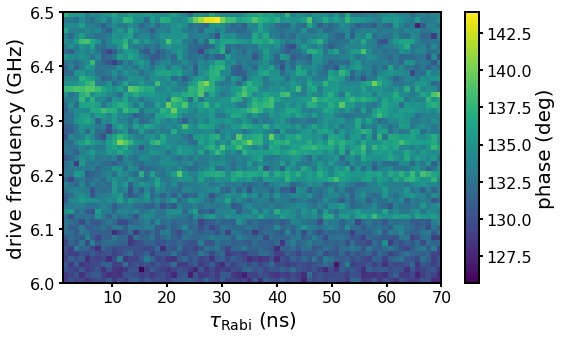

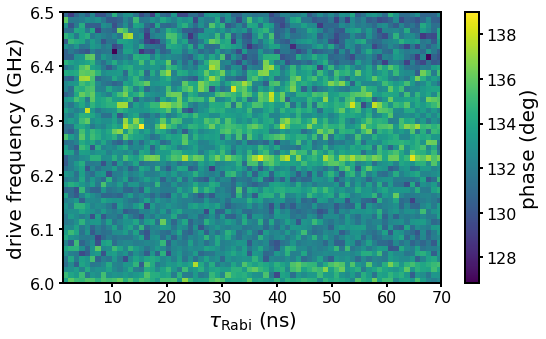

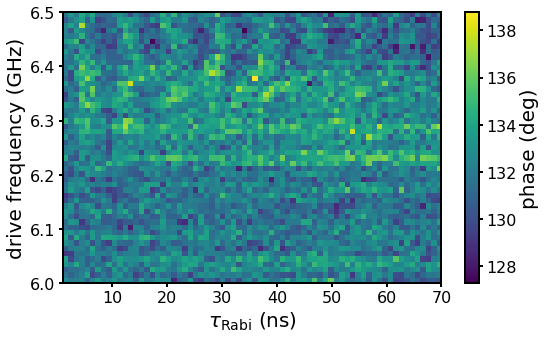

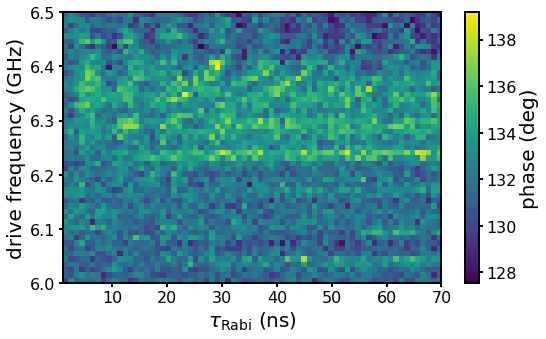

In [24]:
for mag_i in range(5):
    ill = I[mag_i]
    qll = Q[mag_i]
    phase_2d = []
    power = drive[0,:,0]
    phase_2d = qf.get_timed_phase2d(ill, qll, 25)[::-1]
    time = np.linspace(1, len(signal), len(signal))*1e-9
    time_hr = np.linspace(1, len(signal), 5000)*1e-9
    qf.plot_rabi_2d(phase_2d, r'$\tau_\mathrm{Rabi}$ (ns)','drive frequency (GHz)', 'phase (deg)', 
              [time[0]*1e9,time[-1]*1e9, power[0]*1e-9, power[-1]*1e-9])

In [25]:
month = '09'
day = '19'
file_num = '206'
I, Q, drive = qf.get_data_rabiplus1(day, month=month, year=year, file_num=file_num, sample = 'JS681-4fluxonium-005-002-BS')

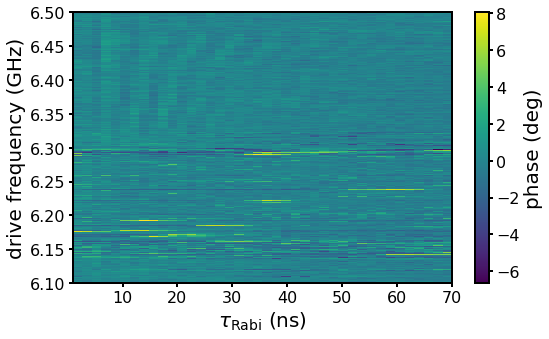

In [32]:
phase_2d = []
power = np.unique(drive)
phase_2d = qf.get_timed_phase2d(I, Q, 100)[::-1]
phase_2d = qf.average_data(phase_2d)
time = np.linspace(1, len(signal), len(signal))*1e-9
time_hr = np.linspace(1, len(signal), 5000)*1e-9
qf.plot_rabi_2d(phase_2d, r'$\tau_\mathrm{Rabi}$ (ns)','drive frequency (GHz)', 'phase (deg)', 
          [time[0]*1e9,time[-1]*1e9, power[0]*1e-9, power[-1]*1e-9])

In [35]:
month = '09'
day = '20'
file_num = '210'
I, Q, drive = qf.get_data_rabiplus1(day, month=month, year=year, file_num=file_num, sample = 'JS681-4fluxonium-005-002-BS', freq = False)

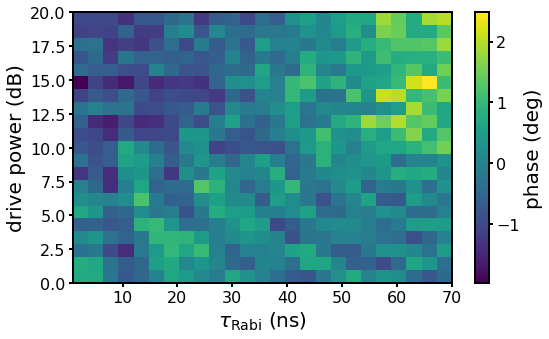

In [40]:
phase_2d = []
power = np.unique(drive)*1e9
phase_2d = qf.get_timed_phase2d(I, Q, 20)
phase_2d = qf.average_data(phase_2d)
time = np.linspace(1, len(signal), len(signal))*1e-9
time_hr = np.linspace(1, len(signal), 5000)*1e-9
qf.plot_rabi_2d(phase_2d, r'$\tau_\mathrm{Rabi}$ (ns)','drive power (dB)', 'phase (deg)', 
          [time[0]*1e9,time[-1]*1e9, power[0]*1e-9, power[-1]*1e-9])